In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from TRSF import trsf

Path_to_samples = '/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/Sample_AGN/cutout_'
# search the directory for files with name starting with cutout_
# and ending with .fits

import glob
filesnames = glob.glob(Path_to_samples + '*.fits')
filesnames

['/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/cutout_17092.1992.fits',
 '/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/cutout_21079.5137.fits',
 '/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/cutout_16888.7246.fits',
 '/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/cutout_16568.5898.fits',
 '/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/cutout_17068.3809.fits',
 '/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/cutout_10073.2861.fits',
 '/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/cutout_21516.918.fits',
 '/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/cutout_15824.7998.fits',
 '/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/cutout_16665.1992.fits',
 '/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/cutout_17092.2402.fits',
 '/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/cutout_19233.1992.fits',
 '/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/cutout_16568.5996.fits',
 '/Users/rs17612/Documents/Radio_Data/SKA_Challenge_1

In [90]:
def trsf_func(data_path):
    data = trsf(data_path,gaussian_fitting=False,region_expansion=False,cutup_img=False,sigma=5,smoothing=True,smooth_param=2,plot=False)
    return data


   
###########################
 _____   ___    ___    ___ 
|_   _| | _ \  / __|  | __|
  | |   |   /  \__ \  | _| 
  |_|   |_|_\  |___/  |_|  
        
###########################
Topological Radio Source Finder.
        
-------------------
Starting TRSF
NOTICE: Image path: /Users/rs17612/Documents/Radio_Data/SKA_Challenge_1/cutout_17141.748.fits
Attempting to open Image...
Error ValueError: data is not 3D!!
Error ValueError: data is not 3D!!
NOTICE: Input Image Size (461, 304)
NOTICE: Image Size with reduced padding (461, 304)
NOTICE: Image opened and cut into 1 pieces.
Calculating persistence diagrams and source properties..


Cutouts Completed:   0%|          | 0/1 [00:00<?, ?it/s]

        Birth         Death     x1     y1     x2     y2      lifetime  \
994  0.001276  6.783750e-07  401.0   80.0    0.0    0.0  1.274917e-03   
689  0.000814  6.783750e-07  179.0   13.0   10.0   63.0  8.129981e-04   
582  0.000643  6.783750e-07   68.0   32.0  168.0    4.0  6.426566e-04   
28   0.000631  3.220939e-05  118.0  190.0  237.0  127.0  5.986275e-04   
13   0.000366  7.669387e-05  291.0  114.0  304.0  111.0  2.895307e-04   
..        ...           ...    ...    ...    ...    ...           ...   
639  0.000003  2.459633e-06   34.0  125.0   28.0  120.0  4.782119e-07   
527  0.000002  2.034384e-06  396.0  173.0  398.0  168.0  3.969139e-07   
166  0.000003  1.630497e-06  180.0  292.0  174.0  286.0  8.871644e-07   
50   0.000003  1.869173e-06  413.0  133.0  398.0  128.0  1.096845e-06   
162  0.000001  1.232230e-06  433.0  202.0  432.0  196.0  1.712237e-08   

     new_row  parent_tag  len_enclosed  single  
994        0         994            48       2  
689        0         689 

Cutouts Completed: 100%|██████████| 1/1 [00:06<00:00,  6.50s/it]


TRSF finished.
Time taken: 6.521989822387695 seconds
-------------------
235


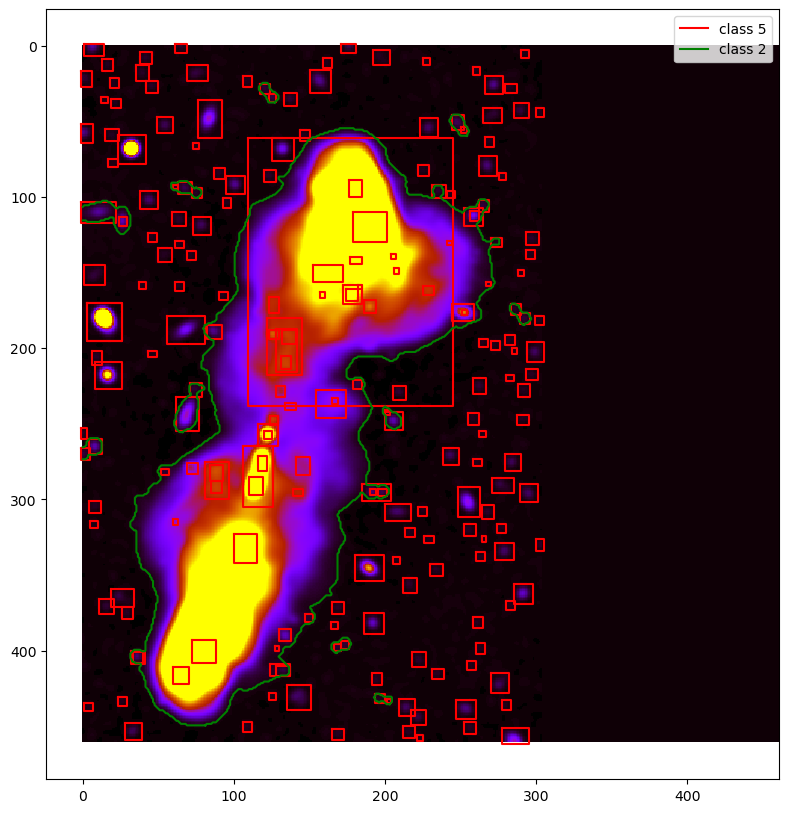

In [129]:
data1 = trsf_func(filesnames[25])
catalogue = data1.catalogue
image = data1.full_img
catalogue['Class'][np.isnan(catalogue['Class'])] = 2

cat = catalogue
print(len(cat))
plt.figure(figsize=(10,10))
plt.imshow(image,cmap='gnuplot',vmax=np.nanpercentile(image,95),interpolation='nearest')
label_p = False
label = False
for i in range(0,len(cat)):
    row = cat.iloc[i]
    bbox = row.bbox
    if bbox != None:
        if row.Class == 2:
            continue
        xmin = bbox[0] - 1
        xmax = bbox[2] + 1
        ymin = bbox[1] - 1
        ymax = bbox[3] + 1
        if label == False:
            plt.plot([ymin,ymin,ymax,ymax,ymin],[xmin,xmax,xmax,xmin,xmin],color='red',label='class 5')
            label = True
        plt.plot([ymin,ymin,ymax,ymax,ymin],[xmin,xmax,xmax,xmin,xmin],color='red')
    else:
        polygon = row.polygon
        if label_p == False:
            plt.plot(polygon[:,1],polygon[:,0],color='green',label='class 2')
            label_p = True
        else:
            plt.plot(polygon[:,1],polygon[:,0],color='green')   
plt.legend()
plt.show()